In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pathlib

# Data Visualization

In [46]:
train_path = 'D:\study\Tensorflow\Dataset_Natural_Scenes\Train_data'
test_path = 'D:\study\Tensorflow\Dataset_Natural_Scenes\Test_data'
train_df = keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size=(160,160),
)

Found 14034 files belonging to 6 classes.


In [47]:
classes = train_df.class_names
print(classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


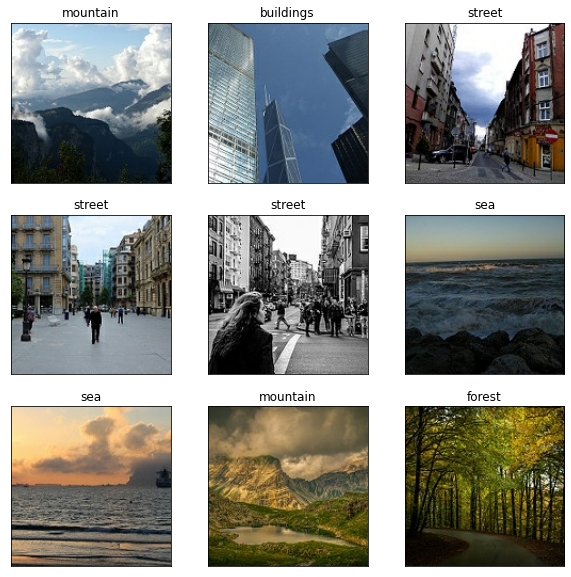

In [48]:
plt.figure(figsize=(10,10))

for images, labels in train_df.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i]/255) 
        plt.title(classes[labels[i]])
        plt.xticks([])
        plt.yticks([])

Assigning training and TEsting Path

In [4]:
training_path = pathlib.Path(r'D:\study\Tensorflow\Dataset_Natural_Scenes\Train_data')
testing_path = pathlib.Path(r'D:\study\Tensorflow\Dataset_Natural_Scenes\Test_data')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Augmentaion and developing Train and Test Generator

In [15]:
train_ = ImageDataGenerator(rescale = 1/255, 
                            rotation_range = 0.4,
                            width_shift_range = 0.3,
                            height_shift_range = 0.3,
                            shear_range = 0.3,
                            zoom_range = 0.4,
                            horizontal_flip = True,
                            vertical_flip = True,
                            fill_mode = 'nearest')
training_generator = train_.flow_from_directory(
                            str(training_path),
                            target_size = (150, 150))
test_ = ImageDataGenerator(rescale = 1/ 255)
testing_generator = test_.flow_from_directory( str(testing_path),
                                              target_size = (150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Preparing the Model

In [32]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape = (150, 150, 3), activation = 'relu' ),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation = 'softmax')    
])

model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

Training and testing the model and recurring Train and Test Accuracy

In [35]:
history = model.fit(training_generator, 
                    steps_per_epoch = 10,
                    epochs = 100,
                    verbose = 1,
                    validation_data = testing_generator,
                    validation_steps=8
                )

Epoch 1/100
10/10 [==============================] - 10s 1s/step - loss: 0.7897 - accuracy: 0.7125 - val_loss: 0.6599 - val_accuracy: 0.7383
Epoch 2/100
10/10 [==============================] - 10s 1s/step - loss: 0.8174 - accuracy: 0.6750 - val_loss: 0.6823 - val_accuracy: 0.7266
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 0.7850 - accuracy: 0.7063 - val_loss: 0.7061 - val_accuracy: 0.7266
Epoch 4/100
10/10 [==============================] - 11s 1s/step - loss: 0.8939 - accuracy: 0.6969 - val_loss: 0.7970 - val_accuracy: 0.6953
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 0.8923 - accuracy: 0.6687 - val_loss: 0.7224 - val_accuracy: 0.7070
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.7567 - accuracy: 0.7188 - val_loss: 0.7101 - val_accuracy: 0.7070
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0.8467 - accuracy: 0.6625 - val_loss: 0.5791 - val_accuracy: 0.7812
Epoch 8/100
1

Visualizing the Train and Test Accuracy at each iterations

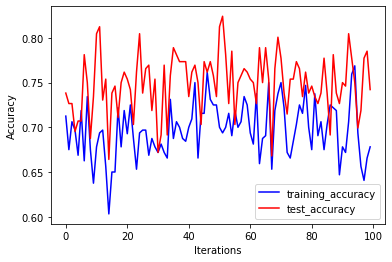

In [43]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, color = 'b', label = 'training_accuracy')
plt.plot(epochs, test_acc, color = 'r', label = 'test_accuracy' )
plt.xlabel('Iterations')
plt.ylabel("Accuracy")
plt.legend()

Visualizing Train and Test Loss at each iterations

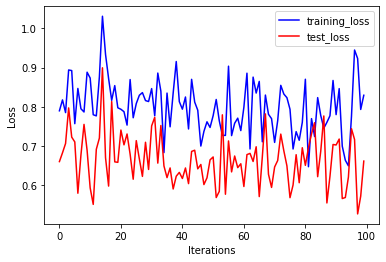

In [45]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, color = 'b', label = 'training_loss')
plt.plot(epochs, test_loss, color = 'r', label = 'test_loss' )
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.legend()

Predicting the images

In [83]:
pred_path = pathlib.Path(r'D:\study\Tensorflow\Dataset_Natural_Scenes')
list(pred_path.glob('*/*.jpg'))[:5]

[WindowsPath('D:/study/Tensorflow/Dataset_Natural_Scenes/Prediction_data/10004.jpg'),
 WindowsPath('D:/study/Tensorflow/Dataset_Natural_Scenes/Prediction_data/10005.jpg'),
 WindowsPath('D:/study/Tensorflow/Dataset_Natural_Scenes/Prediction_data/10012.jpg'),
 WindowsPath('D:/study/Tensorflow/Dataset_Natural_Scenes/Prediction_data/10013.jpg'),
 WindowsPath('D:/study/Tensorflow/Dataset_Natural_Scenes/Prediction_data/10017.jpg')]

In [108]:
classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [113]:
import cv2
def predict_image(index):
    Pred_image = cv2.imread(str(list(pred_path.glob('*/*.jpg'))[index]), 1) # converting image in to array
    plt.imshow(Pred_image) # showing the image
    Pred_image = Pred_image[np.newaxis, ... ] # adding an extra dimension to the image (1, height, width, channel)
    prediction = model.predict(Pred_image) # predicting the image
    print(classes[np.argmax(max(prediction))]) # Printing th class of image

glacier


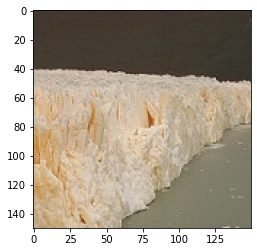

In [116]:
predict_image(7)

street


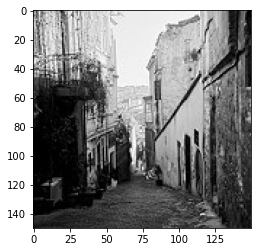

In [119]:
predict_image(80)

forest


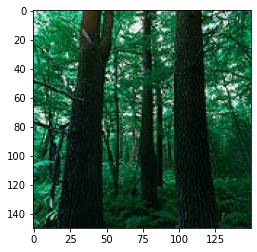

In [126]:
predict_image(52)

buildings


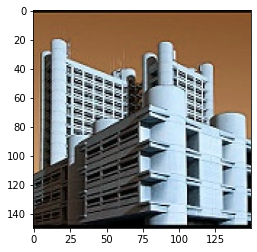

In [132]:
predict_image(800)